# Final code

In [1]:
import sqlite3
from sqlite3 import Error

def create_connection(db_file, delete_db=False):
    import os
    if delete_db and os.path.exists(db_file):
        os.remove(db_file)

    conn = None
    try:
        conn = sqlite3.connect(db_file)
        conn.execute("PRAGMA foreign_keys = 1")
    except Error as e:
        print(e)

    return conn


def create_table(conn, create_table_sql, drop_table_name=None):
    
    if drop_table_name: # You can optionally pass drop_table_name to drop the table. 
        try:
            c = conn.cursor()
            c.execute("""DROP TABLE IF EXISTS %s""" % (drop_table_name))
        except Error as e:
            print(e)
    
    try:
        c = conn.cursor()
        c.execute(create_table_sql)
    except Error as e:
        print(e)
        
def execute_sql_statement(sql_statement, conn):
    cur = conn.cursor()
    cur.execute(sql_statement)

    rows = cur.fetchall()

    return rows

In [2]:
with open('Ranked Measure Data.csv') as file: 
        header = []
        state = set()
        county = set()
        data = list()
        for row in file:
            if not row.strip():
                continue
            if not header: 
                header = row.split(',')
                continue
            line = row.strip().split(',')
            state.add((line[1],))
            if not line[2]:
                pass
            else:
                county.add((line[2],line[1]))
                row = []
                for ele in line[3:]+line[2:3]:
                    try:
                        row.append(int(ele))
                    except: 
                        try: 
                            row.append(float(ele))
                        except: 
                            row.append(ele)
                data.append(row)
#             data.append(line[3:].append(line[2]))

state = list(state)                           
                    
conn = create_connection("Measure Data.db")
cur = conn.cursor()

#add state to db
sql_statement = '''Create Table IF NOT EXISTS [States](
                [StateID] INTEGER not null primary key,
                [State] TEXT not null
                )'''
create_table(conn, sql_statement)
sql_insert = '''Insert into States(State) Values(?)'''
cur.executemany(sql_insert,sorted(state))
conn.commit()

#create dict for state_id
states = cur.execute('select StateID, State from States')
states_dic = dict()
for sid, state in states:
    states_dic[state] = sid

#insert county data
county = [(c,states_dic[s]) for c,s in county]
sql_statement = '''Create Table IF NOT EXISTS [Counties](
                [CountyID] INTEGER not null primary key,
                [County] TEXT not null,
                [StateID] INTEGER not null,
                Foreign Key (StateID) references States(StateID)
                )'''
create_table(conn, sql_statement)
sql_insert = '''Insert into Counties(County,StateID) Values(?,?)'''
cur.executemany(sql_insert,sorted(county))
conn.commit()

#create dict for CountyID
counties = cur.execute('select CountyID, County from Counties')
county_dic = dict()
for cid, county in counties:
    county_dic[county] = cid

for index, ele in enumerate(data): 
    data[index][48] = county_dic[ele[48]]

sql_statement = '''Create Table IF NOT EXISTS [Data](
                [Deaths] Float, 
                [Years_of_Potential_Life_Lost_Rate] Float, 
                [Fair_or_Poor_Health_percentage] Float, 
                [Average_Number_of_Physically_Unhealthy_Days] Float, 
                [Average_Number_of_Mentally_Unhealthy_Days] Float, 
                [Low_birthweight_percentage] Float, 
                [Smokers_percentage] Float, 
                [Adults_with_Obesity_percentage] Float, 
                [Food_Environment_Index] Float, 
                [Physically_Inactive_percentage] Float, 
                [With_Access_to_Exercise_Opportunities_percentage] Float, 
                [Excessive_Drinking_percentage] Float, 
                [Alcohol_Impaired_Driving_Deaths_number] Float, 
                [Driving_Deaths_number] Float, 
                [Driving_Deaths_with_Alcohol_Involvement_percentage] Float, 
                [Chlamydia_Cases_number] Float, 
                [Chlamydia_Rate] Float, 
                [Teen_Birth_Rate] Float, 
                [Uninsured_number] Float, 
                [Uninsured_percentage] Float, 
                [Mental_Health_Providers_number] Float, 
                [Mental_Health_Provider_Rate] Float, 
                [Preventable_Hospitalization_Rate] Float, 
                [Vaccinated_percentage] Float, 
                [Completed_High_School_number] Float, 
                [High_School_Completion_Population] Float, 
                [Completed_High_School_percentage] Float, 
                [Some_College_number] Float, 
                [Some_college_Population] Float, 
                [Some_College_percentage] Float, 
                [Unemployed_number] Float, 
                [Labor_Force] Float, 
                [Unemployed_percentage] Float, 
                [Children_in_Poverty_percentage] Float, 
                [Percentile_Income_80th] Float, 
                [Percentile_Income_20th] Float, 
                [Income_Ratio] Float, 
                [Annual_Average_Violent_Crimes] Float, 
                [Violent_Crime_Rate] Float, 
                [Injury_Deaths_number] Float, 
                [Injury_Death_Rate] Float, 
                [Severe_Housing_Problems_percentage] Float, 
                [Severe_Housing_Cost_Burden] Float, 
                [Overcrowding] Float, 
                [Inadequate_Facilities] Float, 
                [Drive_Alone_to_Work_percentage] Float, 
                [Workers_who_Drive_Alone_number] Float, 
                [Long_Commute_Drives_Alone_percentage] Float,
                [CountyID] Interger,
                Foreign Key (CountyID) references Counties(CountyID)
                )'''
create_table(conn, sql_statement)
sql_insert = '''Insert into Data(Deaths, Years_of_Potential_Life_Lost_Rate, Fair_or_Poor_Health_percentage, 
                Average_Number_of_Physically_Unhealthy_Days, Average_Number_of_Mentally_Unhealthy_Days, Low_birthweight_percentage, 
                Smokers_percentage, Adults_with_Obesity_percentage, Food_Environment_Index, Physically_Inactive_percentage, 
                With_Access_to_Exercise_Opportunities_percentage, Excessive_Drinking_percentage, Alcohol_Impaired_Driving_Deaths_number, 
                Driving_Deaths_number, Driving_Deaths_with_Alcohol_Involvement_percentage, Chlamydia_Cases_number, 
                Chlamydia_Rate, Teen_Birth_Rate, Uninsured_number, Uninsured_percentage, Mental_Health_Providers_number, 
                Mental_Health_Provider_Rate, Preventable_Hospitalization_Rate, Vaccinated_percentage, Completed_High_School_number, 
                High_School_Completion_Population, Completed_High_School_percentage, Some_College_number, Some_college_Population, 
                Some_College_percentage, Unemployed_number, Labor_Force, Unemployed_percentage, Children_in_Poverty_percentage, 
                Percentile_Income_80th, Percentile_Income_20th, Income_Ratio, Annual_Average_Violent_Crimes, Violent_Crime_Rate, 
                Injury_Deaths_number, Injury_Death_Rate, Severe_Housing_Problems_percentage, Severe_Housing_Cost_Burden, 
                Overcrowding, Inadequate_Facilities, Drive_Alone_to_Work_percentage, Workers_who_Drive_Alone_number, 
                Long_Commute_Drives_Alone_percentage, CountyID) 
                Values(?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?)'''
cur.executemany(sql_insert,data)
conn.commit()
conn.close()

## Introduction

About the data and why we use the dataset

###  Tasks have been done in the project: 
Data cleaning, Database normalization, Histogram, ScatterPlot, Linear Regression

##### State table Columns_Name
StateID, State

##### County table Columns_Name
CountyID, County, StateID

##### Data table Colunms_Name 
 'Deaths',
 'Years_of_Potential_Life_Lost_Rate',
 'Smokers_percentage',
 'Adults_with_Obesity_percentage',
 'Food_Environment_Index',
 'Physically_Inactive_percentage',
 'With_Access_to_Exercise_Opportunities_percentage',
 'Excessive_Drinking_percentage',
 'Alcohol_Impaired_Driving_Deaths_number',
 'Driving_Deaths_number',
 'Driving_Deaths_with_Alcohol_Involvement_percentage',
 'Chlamydia_Cases_number',
 'Chlamydia_Rate',
 'Teen_Birth_Rate',
 'Uninsured_number',
 'Uninsured_percentage',
 'Mental_Health_Providers_number',
 'Mental_Health_Provider_Rate',
 'Preventable_Hospitalization_Rate',
 'Vaccinated_percentage',
 'Completed_High_School_number',
 'High_School_Completion_Population',
 'Completed_High_School_percentage',
 'Some_College_number',
 'Some_college_Population',
 'Some_College_percentage',
 'Unemployed_number',
 'Labor_Force',
 'Unemployed_percentage',
 'Children_in_Poverty_percentage',
 'Percentile_Income_80th',
 'Percentile_Income_20th',
 'Income_Ratio',
 'Annual_Average_Violent_Crimes',
 'Violent_Crime_Rate',
 'Injury_Deaths_number',
 'Injury_Death_Rate',
 'Severe_Housing_Problems_percentage',
 'Severe_Housing_Cost_Burden',
 'Overcrowding',
 'Inadequate_Facilities',
 'Drive_Alone_to_Work_percentage',
 'Workers_who_Drive_Alone_number',
 'Long_Commute_Drives_Alone_percentage'


# distribution

### Fair_or_Poor_Health

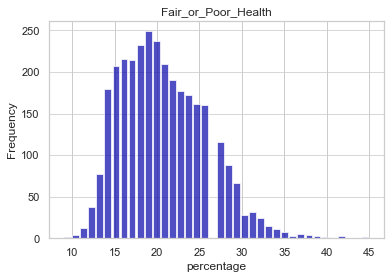

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
conn = create_connection('Measure Data.db')
cur = conn.cursor()
Fair_or_Poor_Health_percentage = list(cur.execute('select Fair_or_Poor_Health_percentage from Data'))
Fair_or_Poor_Health_percentage = pd.DataFrame(Fair_or_Poor_Health_percentage, columns =['Fair_or_Poor_Health_percentage'])
# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=Fair_or_Poor_Health_percentage, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('percentage')
plt.ylabel('Frequency')
plt.title('Fair_or_Poor_Health')
maxfreq = n.max()
plt.savefig('Fair_or_Poor_Health.png')

### physically_unhealthy

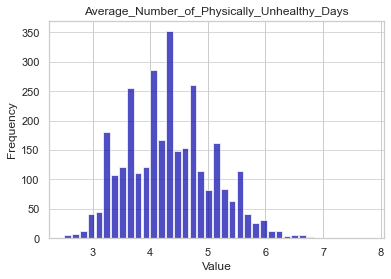

In [80]:
conn = create_connection('Measure Data.db')
cur = conn.cursor()
physically_unhealthy = list(cur.execute('select Average_Number_of_Physically_Unhealthy_Days from Data'))
physically_unhealthy = pd.DataFrame(physically_unhealthy, columns =['Average_Number_of_Physically_Unhealthy'])
# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=physically_unhealthy, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Average_Number_of_Physically_Unhealthy_Days')
maxfreq = n.max()
plt.savefig('Average_Number_of_Physically_Unhealthy_Days.png')

### Average_Number_of_Mentally_Unhealthy_Days

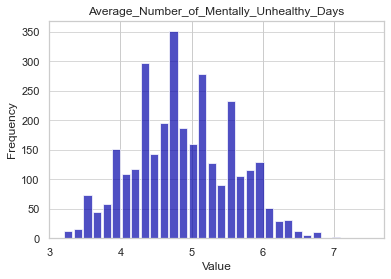

In [81]:
conn = create_connection('Measure Data.db')
cur = conn.cursor()
mentally_unhealthy = list(cur.execute('select Average_Number_of_Mentally_Unhealthy_Days from Data'))
mentally_unhealthy = pd.DataFrame(mentally_unhealthy, columns =['Average_Number_of_Mentally_Unhealthy'])
# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=mentally_unhealthy, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Average_Number_of_Mentally_Unhealthy_Days')
maxfreq = n.max()
plt.savefig('Average_Number_of_Mentally_Unhealthy_Days.png')

### Low_birthweight_percentage

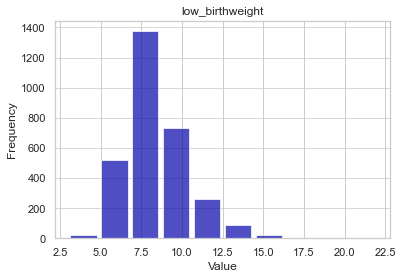

In [82]:
import seaborn as sns
conn = create_connection('Measure Data.db')
cur = conn.cursor()
low_birthweight = list(cur.execute('select Low_birthweight_percentage from Data'))
low_birthweight = pd.DataFrame(low_birthweight, columns =['Low_birthweight_percentage'])
low_birthweight = low_birthweight.replace(r'^\s*$', np.NaN, regex=True)
# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=low_birthweight, color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('low_birthweight')
maxfreq = n.max()
plt.savefig('Low_birthweight_percentage.png')

# scatter plot 

In [7]:
# scatter plot by % Fair or Poor Health

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

<AxesSubplot:xlabel='Smokers_percentage', ylabel='Fair_or_Poor_Health_percentage'>

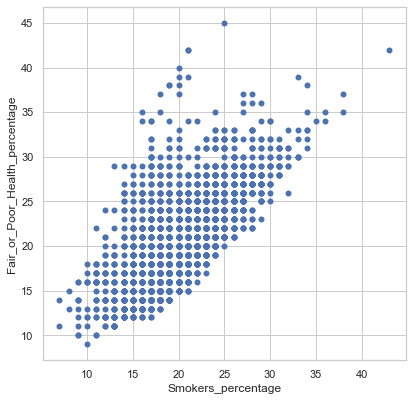

In [9]:
conn = create_connection('Measure Data.db')
cur = conn.cursor()
smoke_effect = list(cur.execute('select Smokers_percentage, Fair_or_Poor_Health_percentage from Data'))
smoke_effect = pd.DataFrame(smoke_effect, columns =['Smokers_percentage', 'Fair_or_Poor_Health_percentage'])
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(x='Smokers_percentage', y='Fair_or_Poor_Health_percentage',
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=smoke_effect, ax=ax)

<AxesSubplot:xlabel='Adults_with_Obesity_percentage', ylabel='Fair_or_Poor_Health_percentage'>

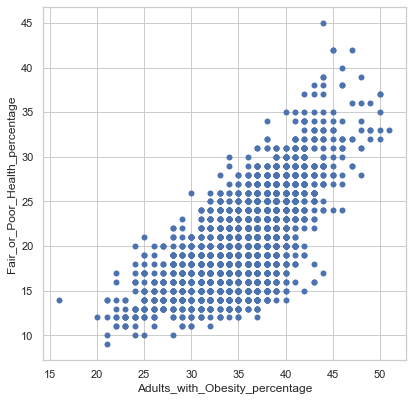

In [10]:
conn = create_connection('Measure Data.db')
cur = conn.cursor()
obesity_effect = list(cur.execute('select Adults_with_Obesity_percentage, Fair_or_Poor_Health_percentage from Data'))
obesity_effect = pd.DataFrame(obesity_effect, columns =['Adults_with_Obesity_percentage', 'Fair_or_Poor_Health_percentage']).replace(r'^\s*$', np.NaN, regex=True)
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(x='Adults_with_Obesity_percentage', y='Fair_or_Poor_Health_percentage',
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=obesity_effect, ax=ax)

<AxesSubplot:xlabel='Food_Environment_Index', ylabel='Fair_or_Poor_Health_percentage'>

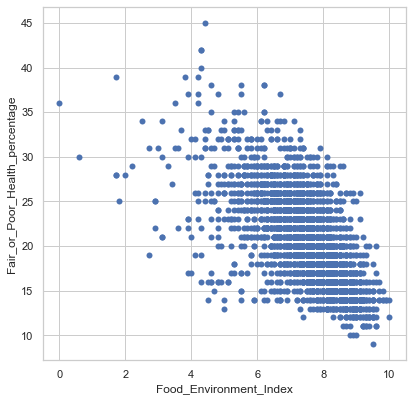

In [11]:
conn = create_connection('Measure Data.db')
cur = conn.cursor()
food_environment_index_effect = list(cur.execute('select Food_Environment_Index, Fair_or_Poor_Health_percentage from Data'))
food_environment_index_effect = pd.DataFrame(food_environment_index_effect, columns =['Food_Environment_Index', 'Fair_or_Poor_Health_percentage']).replace(r'^\s*$', np.NaN, regex=True)
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(x='Food_Environment_Index', y='Fair_or_Poor_Health_percentage',
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=food_environment_index_effect, ax=ax)

<AxesSubplot:xlabel='Physically_Inactive_percentage', ylabel='Fair_or_Poor_Health_percentage'>

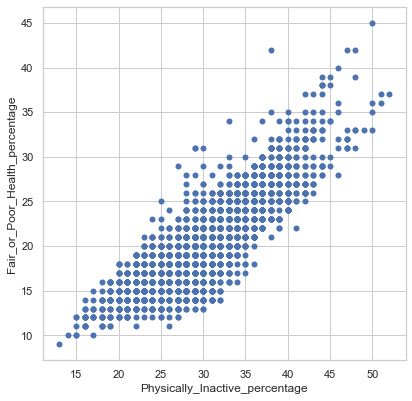

In [12]:
conn = create_connection('Measure Data.db')
cur = conn.cursor()
physically_inactive_effect = list(cur.execute('select Physically_Inactive_percentage, Fair_or_Poor_Health_percentage from Data'))
physically_inactive_effect = pd.DataFrame(physically_inactive_effect, columns =['Physically_Inactive_percentage', 'Fair_or_Poor_Health_percentage']).replace(r'^\s*$', np.NaN, regex=True)
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(x='Physically_Inactive_percentage', y='Fair_or_Poor_Health_percentage',
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=physically_inactive_effect, ax=ax)

<AxesSubplot:xlabel='With_Access_to_Exercise_Opportunities_percentage', ylabel='Fair_or_Poor_Health_percentage'>

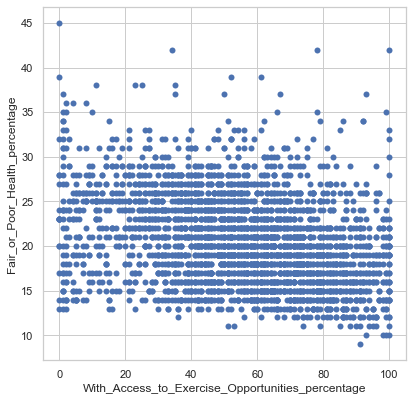

In [13]:
conn = create_connection('Measure Data.db')
cur = conn.cursor()
exercise_opportunity_effect = list(cur.execute('select With_Access_to_Exercise_Opportunities_percentage, Fair_or_Poor_Health_percentage from Data'))
exercise_opportunity_effect = pd.DataFrame(exercise_opportunity_effect, columns =['With_Access_to_Exercise_Opportunities_percentage', 'Fair_or_Poor_Health_percentage']).replace(r'^\s*$', np.NaN, regex=True)
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(x='With_Access_to_Exercise_Opportunities_percentage', y='Fair_or_Poor_Health_percentage',
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=exercise_opportunity_effect, ax=ax)

<AxesSubplot:xlabel='Excessive_Drinking_percentage', ylabel='Fair_or_Poor_Health_percentage'>

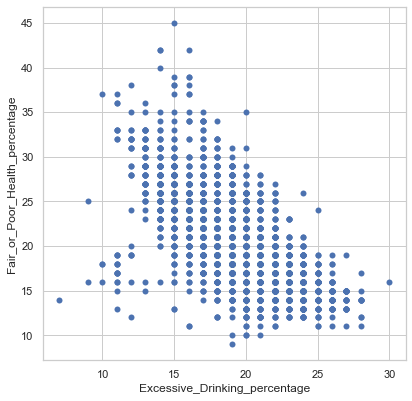

In [14]:
conn = create_connection('Measure Data.db')
cur = conn.cursor()
excessive_drinking_effect = list(cur.execute('select Excessive_Drinking_percentage, Fair_or_Poor_Health_percentage from Data'))
excessive_drinking_effect = pd.DataFrame(excessive_drinking_effect, columns =['Excessive_Drinking_percentage', 'Fair_or_Poor_Health_percentage']).replace(r'^\s*$', np.NaN, regex=True)
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(x='Excessive_Drinking_percentage', y='Fair_or_Poor_Health_percentage',
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=excessive_drinking_effect, ax=ax)

<AxesSubplot:xlabel='Alcohol_Impaired_Driving_Deaths_number', ylabel='Fair_or_Poor_Health_percentage'>

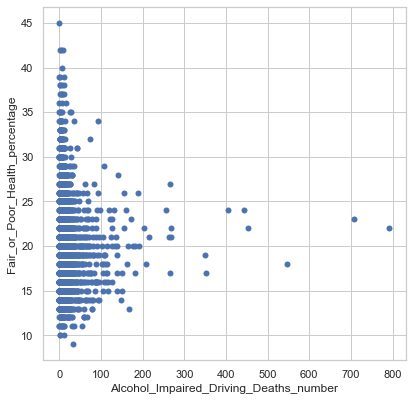

In [15]:
conn = create_connection('Measure Data.db')
cur = conn.cursor()
Alcohol_Impaired_Driving_Deaths_Effect = list(cur.execute('select Alcohol_Impaired_Driving_Deaths_number, Fair_or_Poor_Health_percentage from Data'))
Alcohol_Impaired_Driving_Deaths_Effect = pd.DataFrame(Alcohol_Impaired_Driving_Deaths_Effect, columns =['Alcohol_Impaired_Driving_Deaths_number', 'Fair_or_Poor_Health_percentage']).replace(r'^\s*$', np.NaN, regex=True)
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(x='Alcohol_Impaired_Driving_Deaths_number', y='Fair_or_Poor_Health_percentage',
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=Alcohol_Impaired_Driving_Deaths_Effect, ax=ax)

<AxesSubplot:xlabel='Driving_Deaths_number', ylabel='Fair_or_Poor_Health_percentage'>

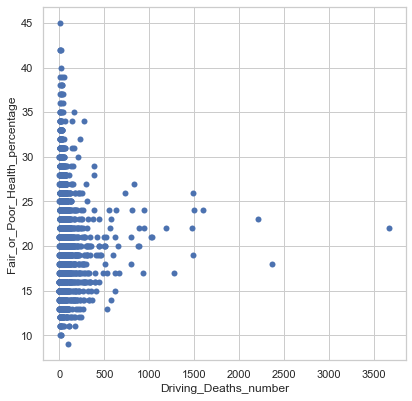

In [16]:
conn = create_connection('Measure Data.db')
cur = conn.cursor()
Driving_Deaths_Effects = list(cur.execute('select Driving_Deaths_number, Fair_or_Poor_Health_percentage from Data'))
Driving_Deaths_Effects = pd.DataFrame(Driving_Deaths_Effects, columns =['Driving_Deaths_number', 'Fair_or_Poor_Health_percentage']).replace(r'^\s*$', np.NaN, regex=True)
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(x='Driving_Deaths_number', y='Fair_or_Poor_Health_percentage',
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=Driving_Deaths_Effects, ax=ax)

<AxesSubplot:xlabel='Driving_Deaths_with_Alcohol_Involvement_percentage', ylabel='Fair_or_Poor_Health_percentage'>

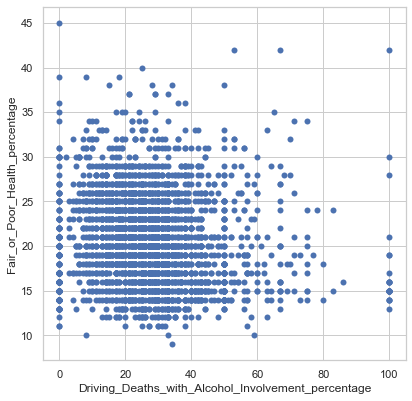

In [17]:
conn = create_connection('Measure Data.db')
cur = conn.cursor()
Driving_Deaths_with_Alcohol_Involvement_Effect = list(cur.execute('select Driving_Deaths_with_Alcohol_Involvement_percentage, Fair_or_Poor_Health_percentage from Data'))
Driving_Deaths_with_Alcohol_Involvement_Effect = pd.DataFrame(Driving_Deaths_with_Alcohol_Involvement_Effect, columns =['Driving_Deaths_with_Alcohol_Involvement_percentage', 'Fair_or_Poor_Health_percentage']).replace(r'^\s*$', np.NaN, regex=True)
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(x='Driving_Deaths_with_Alcohol_Involvement_percentage', y='Fair_or_Poor_Health_percentage',
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=Driving_Deaths_with_Alcohol_Involvement_Effect, ax=ax)

<AxesSubplot:xlabel='Chlamydia_Cases_number', ylabel='Fair_or_Poor_Health_percentage'>

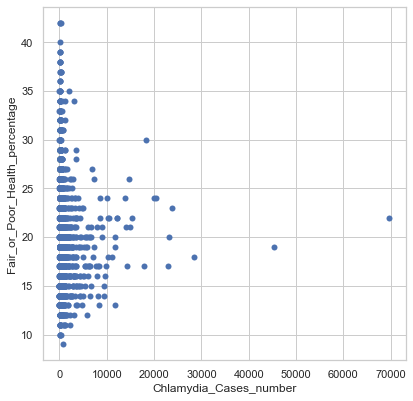

In [18]:
conn = create_connection('Measure Data.db')
cur = conn.cursor()
Chlamydia_Cases_Effect = list(cur.execute('select Chlamydia_Cases_number, Fair_or_Poor_Health_percentage from Data'))
Chlamydia_Cases_Effect = pd.DataFrame(Chlamydia_Cases_Effect, columns =['Chlamydia_Cases_number', 'Fair_or_Poor_Health_percentage']).replace(r'^\s*$', np.NaN, regex=True)
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(x='Chlamydia_Cases_number', y='Fair_or_Poor_Health_percentage',
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=Chlamydia_Cases_Effect, ax=ax)

<AxesSubplot:xlabel='Chlamydia_Rate', ylabel='Fair_or_Poor_Health_percentage'>

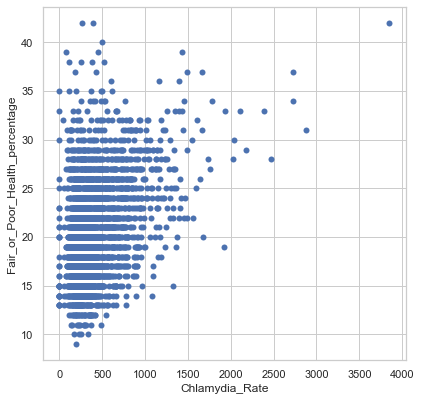

In [19]:
conn = create_connection('Measure Data.db')
cur = conn.cursor()
Chlamydia_Rate_Effect = list(cur.execute('select Chlamydia_Rate, Fair_or_Poor_Health_percentage from Data'))
Chlamydia_Rate_Effect = pd.DataFrame(Chlamydia_Rate_Effect, columns =['Chlamydia_Rate', 'Fair_or_Poor_Health_percentage']).replace(r'^\s*$', np.NaN, regex=True)
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(x='Chlamydia_Rate', y='Fair_or_Poor_Health_percentage',
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=Chlamydia_Rate_Effect, ax=ax)

<AxesSubplot:xlabel='Teen_Birth_Rate', ylabel='Fair_or_Poor_Health_percentage'>

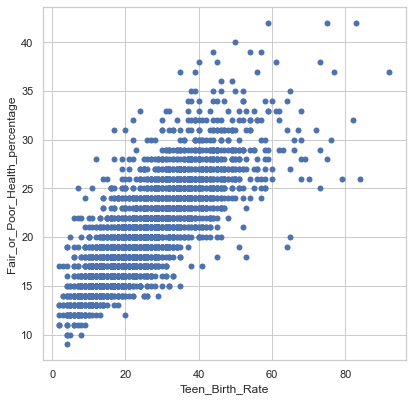

In [20]:
conn = create_connection('Measure Data.db')
cur = conn.cursor()
Teen_Birth_Rate_Effect = list(cur.execute('select Teen_Birth_Rate, Fair_or_Poor_Health_percentage from Data'))
Teen_Birth_Rate_Effect = pd.DataFrame(Teen_Birth_Rate_Effect, columns =['Teen_Birth_Rate', 'Fair_or_Poor_Health_percentage']).replace(r'^\s*$', np.NaN, regex=True)
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(x='Teen_Birth_Rate', y='Fair_or_Poor_Health_percentage',
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=Teen_Birth_Rate_Effect, ax=ax)

In [21]:
# scatter plot by Average Number of Physically Unhealthy Days

<AxesSubplot:xlabel='Smokers_percentage', ylabel='Average_Number_of_Physically_Unhealthy_Days'>

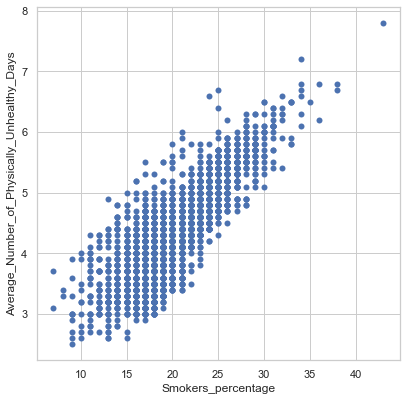

In [22]:
conn = create_connection('Measure Data.db')
cur = conn.cursor()
smoke_effect_physical = list(cur.execute('select Smokers_percentage, Average_Number_of_Physically_Unhealthy_Days from Data'))
smoke_effect_physical = pd.DataFrame(smoke_effect_physical, columns =['Smokers_percentage', 'Average_Number_of_Physically_Unhealthy_Days']).replace(r'^\s*$', np.NaN, regex=True)
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(x='Smokers_percentage', y='Average_Number_of_Physically_Unhealthy_Days',
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=smoke_effect_physical, ax=ax)

<AxesSubplot:xlabel='Adults_with_Obesity_percentage', ylabel='Average_Number_of_Physically_Unhealthy_Days'>

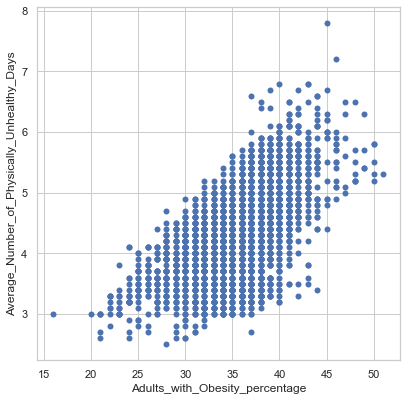

In [23]:
conn = create_connection('Measure Data.db')
cur = conn.cursor()
obesity_effect_physical = list(cur.execute('select Adults_with_Obesity_percentage, Average_Number_of_Physically_Unhealthy_Days from Data'))
obesity_effect_physical = pd.DataFrame(obesity_effect_physical, columns =['Adults_with_Obesity_percentage', 'Average_Number_of_Physically_Unhealthy_Days']).replace(r'^\s*$', np.NaN, regex=True)
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(x='Adults_with_Obesity_percentage', y='Average_Number_of_Physically_Unhealthy_Days',
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=obesity_effect_physical, ax=ax)

<AxesSubplot:xlabel='Food_Environment_Index', ylabel='Average_Number_of_Physically_Unhealthy_Days'>

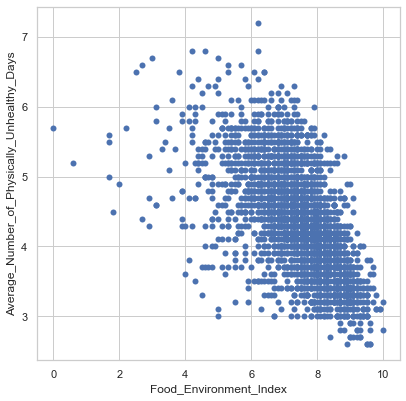

In [24]:
conn = create_connection('Measure Data.db')
cur = conn.cursor()
food_environment_index_effect_physical = list(cur.execute('select Food_Environment_Index, Average_Number_of_Physically_Unhealthy_Days from Data'))
food_environment_index_effect_physical = pd.DataFrame(food_environment_index_effect_physical, columns =['Food_Environment_Index', 'Average_Number_of_Physically_Unhealthy_Days']).replace(r'^\s*$', np.NaN, regex=True)
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(x='Food_Environment_Index', y='Average_Number_of_Physically_Unhealthy_Days',
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=food_environment_index_effect_physical, ax=ax)

<AxesSubplot:xlabel='Physically_Inactive_percentage', ylabel='Average_Number_of_Physically_Unhealthy_Days'>

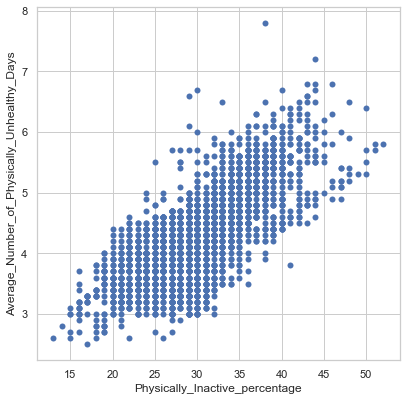

In [25]:
conn = create_connection('Measure Data.db')
cur = conn.cursor()
physical_inactive_effect_physical = list(cur.execute('select Physically_Inactive_percentage, Average_Number_of_Physically_Unhealthy_Days from Data'))
physical_inactive_effect_physical = pd.DataFrame(physical_inactive_effect_physical, columns =['Physically_Inactive_percentage', 'Average_Number_of_Physically_Unhealthy_Days']).replace(r'^\s*$', np.NaN, regex=True)
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(x='Physically_Inactive_percentage', y='Average_Number_of_Physically_Unhealthy_Days',
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=physical_inactive_effect_physical, ax=ax)

<AxesSubplot:xlabel='With_Access_to_Exercise_Opportunities_percentage', ylabel='Average_Number_of_Physically_Unhealthy_Days'>

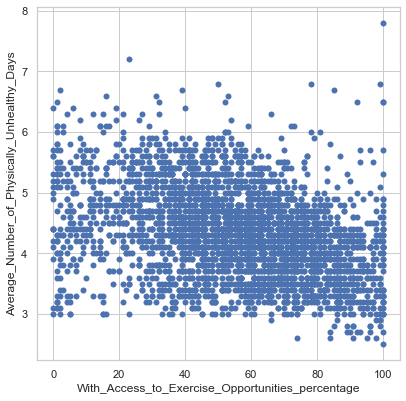

In [26]:
conn = create_connection('Measure Data.db')
cur = conn.cursor()
exercise_opportunity_effect_physical = list(cur.execute('select With_Access_to_Exercise_Opportunities_percentage, Average_Number_of_Physically_Unhealthy_Days from Data'))
exercise_opportunity_effect_physical = pd.DataFrame(exercise_opportunity_effect_physical, columns =['With_Access_to_Exercise_Opportunities_percentage', 'Average_Number_of_Physically_Unhealthy_Days']).replace(r'^\s*$', np.NaN, regex=True)
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(x='With_Access_to_Exercise_Opportunities_percentage', y='Average_Number_of_Physically_Unhealthy_Days',
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=exercise_opportunity_effect_physical, ax=ax)

<AxesSubplot:xlabel='Excessive_Drinking_percentage', ylabel='Average_Number_of_Physically_Unhealthy_Days'>

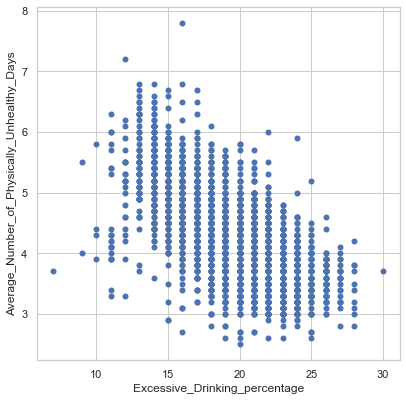

In [27]:
conn = create_connection('Measure Data.db')
cur = conn.cursor()
excessive_drinking_effect_physical = list(cur.execute('select Excessive_Drinking_percentage, Average_Number_of_Physically_Unhealthy_Days from Data'))
excessive_drinking_effect_physical = pd.DataFrame(excessive_drinking_effect_physical, columns =['Excessive_Drinking_percentage', 'Average_Number_of_Physically_Unhealthy_Days']).replace(r'^\s*$', np.NaN, regex=True)
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(x='Excessive_Drinking_percentage', y='Average_Number_of_Physically_Unhealthy_Days',
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=excessive_drinking_effect_physical, ax=ax)

<AxesSubplot:xlabel='Alcohol_Impaired_Driving_Deaths_number', ylabel='Average_Number_of_Physically_Unhealthy_Days'>

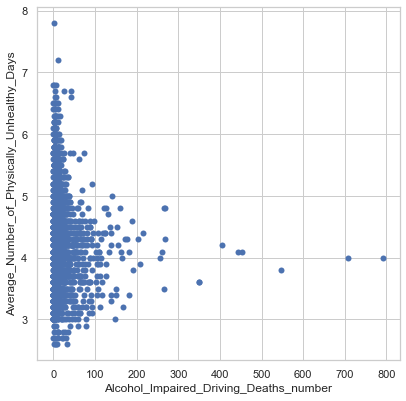

In [28]:
conn = create_connection('Measure Data.db')
cur = conn.cursor()
Alcohol_Impaired_Driving_Deaths_Effect_Physical = list(cur.execute('select Alcohol_Impaired_Driving_Deaths_number, Average_Number_of_Physically_Unhealthy_Days from Data'))
Alcohol_Impaired_Driving_Deaths_Effect_Physical = pd.DataFrame(Alcohol_Impaired_Driving_Deaths_Effect_Physical, columns =['Alcohol_Impaired_Driving_Deaths_number', 'Average_Number_of_Physically_Unhealthy_Days']).replace(r'^\s*$', np.NaN, regex=True)
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(x='Alcohol_Impaired_Driving_Deaths_number', y='Average_Number_of_Physically_Unhealthy_Days',
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=Alcohol_Impaired_Driving_Deaths_Effect_Physical, ax=ax)

<AxesSubplot:xlabel='Driving_Deaths_number', ylabel='Average_Number_of_Physically_Unhealthy_Days'>

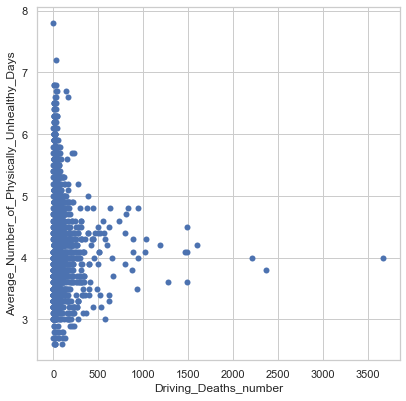

In [29]:
conn = create_connection('Measure Data.db')
cur = conn.cursor()
Driving_Deaths_Effect_Physical = list(cur.execute('select Driving_Deaths_number, Average_Number_of_Physically_Unhealthy_Days from Data'))
Driving_Deaths_Effect_Physical = pd.DataFrame(Driving_Deaths_Effect_Physical, columns =['Driving_Deaths_number', 'Average_Number_of_Physically_Unhealthy_Days']).replace(r'^\s*$', np.NaN, regex=True)
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(x='Driving_Deaths_number', y='Average_Number_of_Physically_Unhealthy_Days',
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=Driving_Deaths_Effect_Physical, ax=ax)

<AxesSubplot:xlabel='Driving_Deaths_with_Alcohol_Involvement_percentage', ylabel='Average_Number_of_Physically_Unhealthy_Days'>

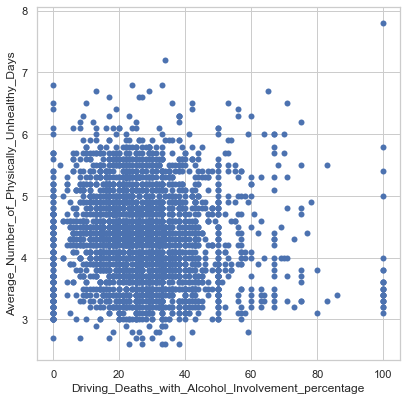

In [30]:
conn = create_connection('Measure Data.db')
cur = conn.cursor()
Driving_Deaths_with_Alcohol_Involvement_Effect_Physical = list(cur.execute('select Driving_Deaths_with_Alcohol_Involvement_percentage, Average_Number_of_Physically_Unhealthy_Days from Data'))
Driving_Deaths_with_Alcohol_Involvement_Effect_Physical = pd.DataFrame(Driving_Deaths_with_Alcohol_Involvement_Effect_Physical, columns =['Driving_Deaths_with_Alcohol_Involvement_percentage', 'Average_Number_of_Physically_Unhealthy_Days']).replace(r'^\s*$', np.NaN, regex=True)
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(x='Driving_Deaths_with_Alcohol_Involvement_percentage', y='Average_Number_of_Physically_Unhealthy_Days',
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=Driving_Deaths_with_Alcohol_Involvement_Effect_Physical, ax=ax)

<AxesSubplot:xlabel='Chlamydia_Cases_number', ylabel='Average_Number_of_Physically_Unhealthy_Days'>

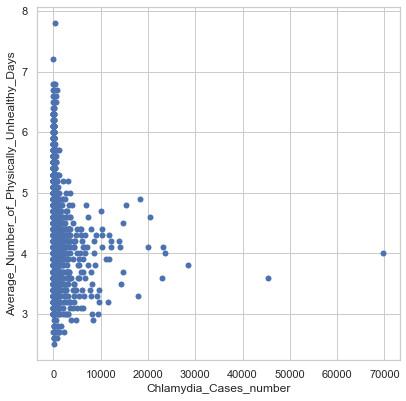

In [31]:
conn = create_connection('Measure Data.db')
cur = conn.cursor()
Chlamydia_Cases_Effect_Physical = list(cur.execute('select Chlamydia_Cases_number, Average_Number_of_Physically_Unhealthy_Days from Data'))
Chlamydia_Cases_Effect_Physical = pd.DataFrame(Chlamydia_Cases_Effect_Physical, columns =['Chlamydia_Cases_number', 'Average_Number_of_Physically_Unhealthy_Days']).replace(r'^\s*$', np.NaN, regex=True)
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(x='Chlamydia_Cases_number', y='Average_Number_of_Physically_Unhealthy_Days',
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=Chlamydia_Cases_Effect_Physical, ax=ax)

<AxesSubplot:xlabel='Chlamydia_Rate', ylabel='Average_Number_of_Physically_Unhealthy_Days'>

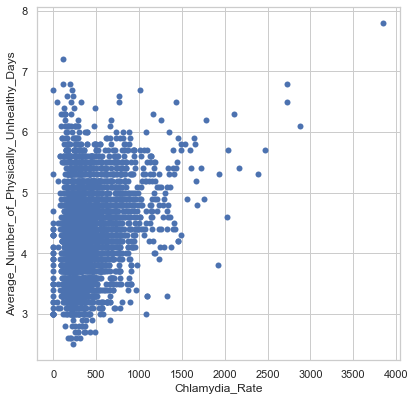

In [32]:
conn = create_connection('Measure Data.db')
cur = conn.cursor()
Chlamydia_Rate_Effect_Physical = list(cur.execute('select Chlamydia_Rate, Average_Number_of_Physically_Unhealthy_Days from Data'))
Chlamydia_Rate_Effect_Physical = pd.DataFrame(Chlamydia_Rate_Effect_Physical, columns =['Chlamydia_Rate', 'Average_Number_of_Physically_Unhealthy_Days']).replace(r'^\s*$', np.NaN, regex=True)
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(x='Chlamydia_Rate', y='Average_Number_of_Physically_Unhealthy_Days',
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=Chlamydia_Rate_Effect_Physical, ax=ax)

<AxesSubplot:xlabel='Teen_Birth_Rate', ylabel='Average_Number_of_Physically_Unhealthy_Days'>

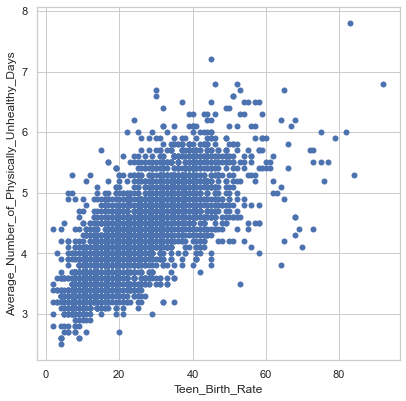

In [33]:
conn = create_connection('Measure Data.db')
cur = conn.cursor()
Teen_Birth_Rate_Effect_Physical = list(cur.execute('select Teen_Birth_Rate, Average_Number_of_Physically_Unhealthy_Days from Data'))
Teen_Birth_Rate_Effect_Physical = pd.DataFrame(Teen_Birth_Rate_Effect_Physical, columns =['Teen_Birth_Rate', 'Average_Number_of_Physically_Unhealthy_Days']).replace(r'^\s*$', np.NaN, regex=True)
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(x='Teen_Birth_Rate', y='Average_Number_of_Physically_Unhealthy_Days',
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=Teen_Birth_Rate_Effect_Physical, ax=ax)

In [34]:
# scatter plot by Average Number of Mentally Unhealthy Days

<AxesSubplot:xlabel='Smokers_percentage', ylabel='Average_Number_of_Mentally_Unhealthy_Days'>

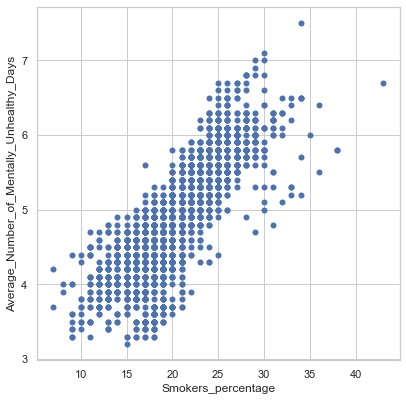

In [35]:
conn = create_connection('Measure Data.db')
cur = conn.cursor()
smoke_effect_mental = list(cur.execute('select Smokers_percentage, Average_Number_of_Mentally_Unhealthy_Days from Data'))
smoke_effect_mental = pd.DataFrame(smoke_effect_mental, columns =['Smokers_percentage', 'Average_Number_of_Mentally_Unhealthy_Days']).replace(r'^\s*$', np.NaN, regex=True)
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(x='Smokers_percentage', y='Average_Number_of_Mentally_Unhealthy_Days',
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=smoke_effect_mental, ax=ax)

<AxesSubplot:xlabel='Adults_with_Obesity_percentage', ylabel='Average_Number_of_Mentally_Unhealthy_Days'>

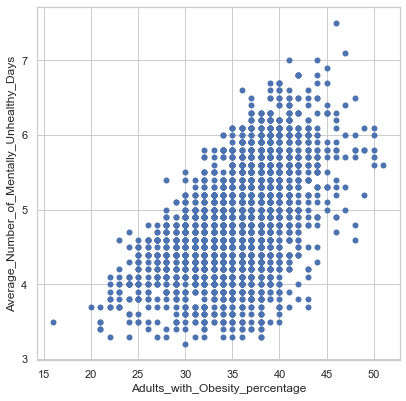

In [36]:

conn = create_connection('Measure Data.db')
cur = conn.cursor()
obesity_effect_mental = list(cur.execute('select Adults_with_Obesity_percentage, Average_Number_of_Mentally_Unhealthy_Days from Data'))
obesity_effect_mental = pd.DataFrame(obesity_effect_mental, columns =['Adults_with_Obesity_percentage', 'Average_Number_of_Mentally_Unhealthy_Days']).replace(r'^\s*$', np.NaN, regex=True)
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(x='Adults_with_Obesity_percentage', y='Average_Number_of_Mentally_Unhealthy_Days',
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=obesity_effect_mental, ax=ax)

<AxesSubplot:xlabel='Food_Environment_Index', ylabel='Average_Number_of_Mentally_Unhealthy_Days'>

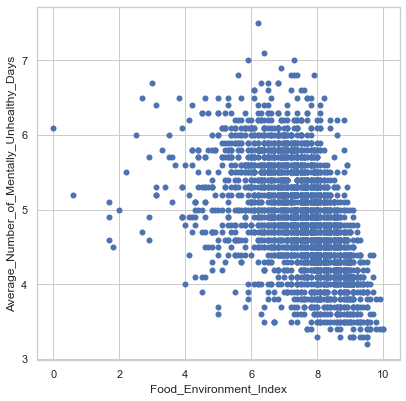

In [37]:
conn = create_connection('Measure Data.db')
cur = conn.cursor()
food_environment_index_effect_mental = list(cur.execute('select Food_Environment_Index, Average_Number_of_Mentally_Unhealthy_Days from Data'))
food_environment_index_effect_mental = pd.DataFrame(food_environment_index_effect_mental, columns =['Food_Environment_Index', 'Average_Number_of_Mentally_Unhealthy_Days']).replace(r'^\s*$', np.NaN, regex=True)
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(x='Food_Environment_Index', y='Average_Number_of_Mentally_Unhealthy_Days',
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=food_environment_index_effect_mental, ax=ax)

<AxesSubplot:xlabel='Physically_Inactive_percentage', ylabel='Average_Number_of_Mentally_Unhealthy_Days'>

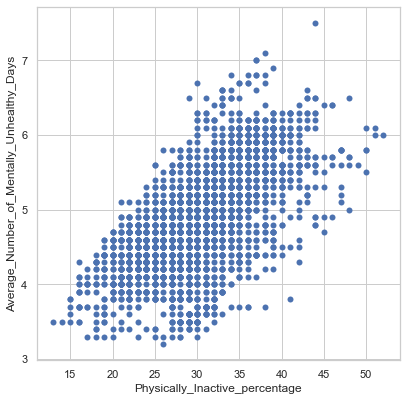

In [38]:
conn = create_connection('Measure Data.db')
cur = conn.cursor()
physical_inactive_effect_mental = list(cur.execute('select Physically_Inactive_percentage, Average_Number_of_Mentally_Unhealthy_Days from Data'))
physical_inactive_effect_mental = pd.DataFrame(physical_inactive_effect_mental, columns =['Physically_Inactive_percentage', 'Average_Number_of_Mentally_Unhealthy_Days']).replace(r'^\s*$', np.NaN, regex=True)
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(x='Physically_Inactive_percentage', y='Average_Number_of_Mentally_Unhealthy_Days',
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=physical_inactive_effect_mental, ax=ax)

<AxesSubplot:xlabel='With_Access_to_Exercise_Opportunities_percentage', ylabel='Average_Number_of_Mentally_Unhealthy_Days'>

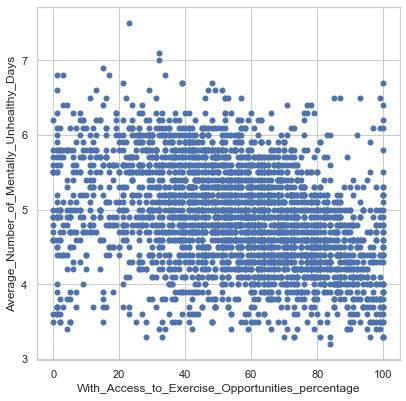

In [39]:
conn = create_connection('Measure Data.db')
cur = conn.cursor()
exercise_opportunity_effect_mental = list(cur.execute('select With_Access_to_Exercise_Opportunities_percentage, Average_Number_of_Mentally_Unhealthy_Days from Data'))
exercise_opportunity_effect_mental = pd.DataFrame(exercise_opportunity_effect_mental, columns =['With_Access_to_Exercise_Opportunities_percentage', 'Average_Number_of_Mentally_Unhealthy_Days']).replace(r'^\s*$', np.NaN, regex=True)
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(x='With_Access_to_Exercise_Opportunities_percentage', y='Average_Number_of_Mentally_Unhealthy_Days',
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=exercise_opportunity_effect_mental, ax=ax)

<AxesSubplot:xlabel='Excessive_Drinking_percentage', ylabel='Average_Number_of_Mentally_Unhealthy_Days'>

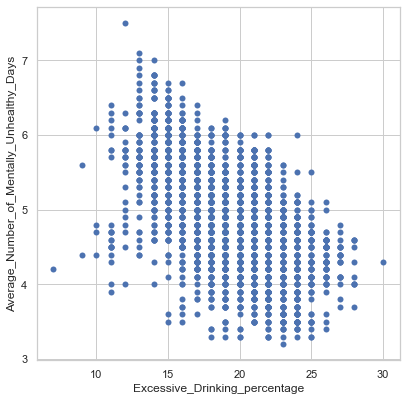

In [40]:
conn = create_connection('Measure Data.db')
cur = conn.cursor()
excessive_drinking_effect_mental = list(cur.execute('select Excessive_Drinking_percentage, Average_Number_of_Mentally_Unhealthy_Days from Data'))
excessive_drinking_effect_mental = pd.DataFrame(excessive_drinking_effect_mental, columns =['Excessive_Drinking_percentage', 'Average_Number_of_Mentally_Unhealthy_Days']).replace(r'^\s*$', np.NaN, regex=True)
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(x='Excessive_Drinking_percentage', y='Average_Number_of_Mentally_Unhealthy_Days',
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=excessive_drinking_effect_mental, ax=ax)

<AxesSubplot:xlabel='Alcohol_Impaired_Driving_Deaths_number', ylabel='Average_Number_of_Mentally_Unhealthy_Days'>

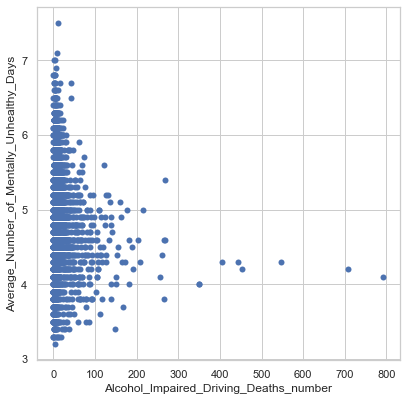

In [41]:
conn = create_connection('Measure Data.db')
cur = conn.cursor()
Alcohol_Impaired_Driving_Deaths_Effect_Mental = list(cur.execute('select Alcohol_Impaired_Driving_Deaths_number, Average_Number_of_Mentally_Unhealthy_Days from Data'))
Alcohol_Impaired_Driving_Deaths_Effect_Mental = pd.DataFrame(Alcohol_Impaired_Driving_Deaths_Effect_Mental, columns =['Alcohol_Impaired_Driving_Deaths_number', 'Average_Number_of_Mentally_Unhealthy_Days']).replace(r'^\s*$', np.NaN, regex=True)
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(x='Alcohol_Impaired_Driving_Deaths_number', y='Average_Number_of_Mentally_Unhealthy_Days',
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=Alcohol_Impaired_Driving_Deaths_Effect_Mental, ax=ax)

<AxesSubplot:xlabel='Driving_Deaths_number', ylabel='Average_Number_of_Mentally_Unhealthy_Days'>

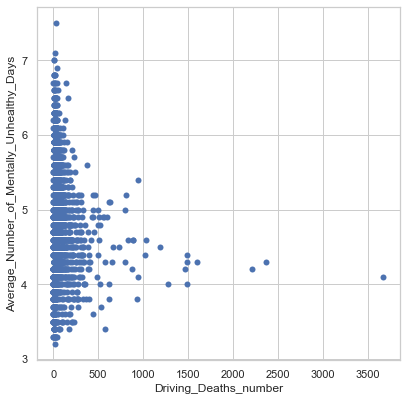

In [42]:
conn = create_connection('Measure Data.db')
cur = conn.cursor()
Driving_Deaths_Effect_Mental = list(cur.execute('select Driving_Deaths_number, Average_Number_of_Mentally_Unhealthy_Days from Data'))
Driving_Deaths_Effect_Mental = pd.DataFrame(Driving_Deaths_Effect_Mental, columns =['Driving_Deaths_number', 'Average_Number_of_Mentally_Unhealthy_Days']).replace(r'^\s*$', np.NaN, regex=True)
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(x='Driving_Deaths_number', y='Average_Number_of_Mentally_Unhealthy_Days',
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=Driving_Deaths_Effect_Mental, ax=ax)

<AxesSubplot:xlabel='Driving_Deaths_with_Alcohol_Involvement_percentage', ylabel='Average_Number_of_Mentally_Unhealthy_Days'>

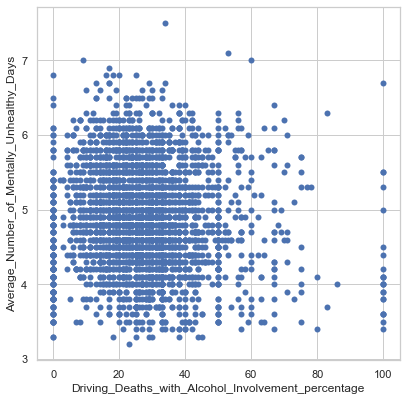

In [43]:
conn = create_connection('Measure Data.db')
cur = conn.cursor()
Driving_Deaths_with_Alcohol_Involvement_Effect_Mental = list(cur.execute('select Driving_Deaths_with_Alcohol_Involvement_percentage, Average_Number_of_Mentally_Unhealthy_Days from Data'))
Driving_Deaths_with_Alcohol_Involvement_Effect_Mental = pd.DataFrame(Driving_Deaths_with_Alcohol_Involvement_Effect_Mental, columns =['Driving_Deaths_with_Alcohol_Involvement_percentage', 'Average_Number_of_Mentally_Unhealthy_Days']).replace(r'^\s*$', np.NaN, regex=True)
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(x='Driving_Deaths_with_Alcohol_Involvement_percentage', y='Average_Number_of_Mentally_Unhealthy_Days',
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=Driving_Deaths_with_Alcohol_Involvement_Effect_Mental, ax=ax)

<AxesSubplot:xlabel='Chlamydia_Cases_number', ylabel='Average_Number_of_Mentally_Unhealthy_Days'>

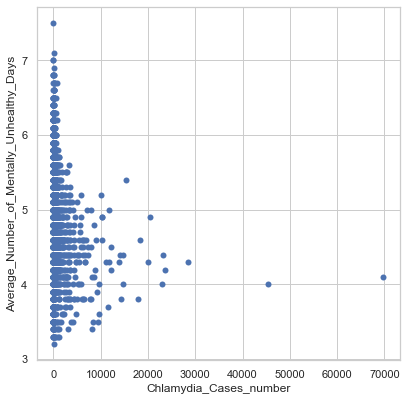

In [44]:
conn = create_connection('Measure Data.db')
cur = conn.cursor()
Chlamydia_Cases_Effect_Mental = list(cur.execute('select Chlamydia_Cases_number, Average_Number_of_Mentally_Unhealthy_Days from Data'))
Chlamydia_Cases_Effect_Mental = pd.DataFrame(Chlamydia_Cases_Effect_Mental, columns =['Chlamydia_Cases_number', 'Average_Number_of_Mentally_Unhealthy_Days']).replace(r'^\s*$', np.NaN, regex=True)
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(x='Chlamydia_Cases_number', y='Average_Number_of_Mentally_Unhealthy_Days',
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=Chlamydia_Cases_Effect_Mental, ax=ax)

<AxesSubplot:xlabel='Chlamydia_Rate', ylabel='Average_Number_of_Mentally_Unhealthy_Days'>

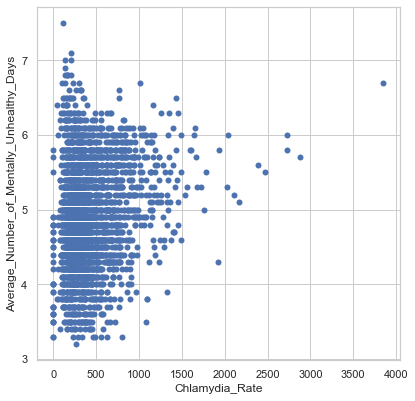

In [45]:
conn = create_connection('Measure Data.db')
cur = conn.cursor()
Chlamydia_Rate_Effect_Mental = list(cur.execute('select Chlamydia_Rate, Average_Number_of_Mentally_Unhealthy_Days from Data'))
Chlamydia_Rate_Effect_Mental = pd.DataFrame(Chlamydia_Rate_Effect_Mental, columns =['Chlamydia_Rate', 'Average_Number_of_Mentally_Unhealthy_Days']).replace(r'^\s*$', np.NaN, regex=True)
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(x='Chlamydia_Rate', y='Average_Number_of_Mentally_Unhealthy_Days',
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=Chlamydia_Rate_Effect_Mental, ax=ax)

<AxesSubplot:xlabel='Teen_Birth_Rate', ylabel='Average_Number_of_Mentally_Unhealthy_Days'>

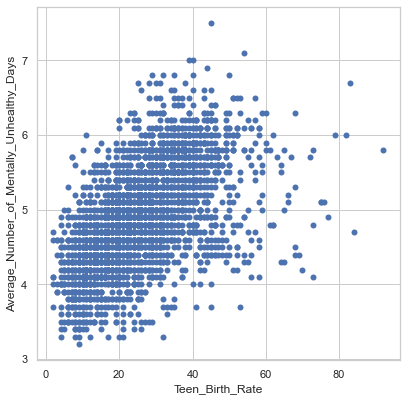

In [46]:
conn = create_connection('Measure Data.db')
cur = conn.cursor()
Teen_Birth_Rate_Effect_Mental = list(cur.execute('select Teen_Birth_Rate, Average_Number_of_Mentally_Unhealthy_Days from Data'))
Teen_Birth_Rate_Effect_Mental = pd.DataFrame(Teen_Birth_Rate_Effect_Mental, columns =['Teen_Birth_Rate', 'Average_Number_of_Mentally_Unhealthy_Days']).replace(r'^\s*$', np.NaN, regex=True)
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(x='Teen_Birth_Rate', y='Average_Number_of_Mentally_Unhealthy_Days',
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=Teen_Birth_Rate_Effect_Mental, ax=ax)

In [47]:
# scatter plot by % Low birthweight

<AxesSubplot:xlabel='Smokers_percentage', ylabel='Low_birthweight_percentage'>

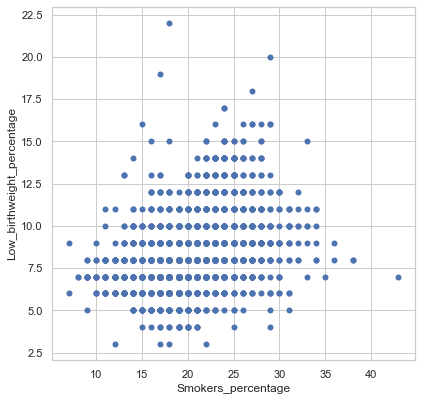

In [48]:
conn = create_connection('Measure Data.db')
cur = conn.cursor()
smoke_effect_bw = list(cur.execute('select Smokers_percentage, Low_birthweight_percentage from Data'))
smoke_effect_bw = pd.DataFrame(smoke_effect_bw, columns =['Smokers_percentage', 'Low_birthweight_percentage']).replace(r'^\s*$', np.NaN, regex=True)
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(x='Smokers_percentage', y='Low_birthweight_percentage',
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=smoke_effect_bw, ax=ax)

<AxesSubplot:xlabel='Adults_with_Obesity_percentage', ylabel='Low_birthweight_percentage'>

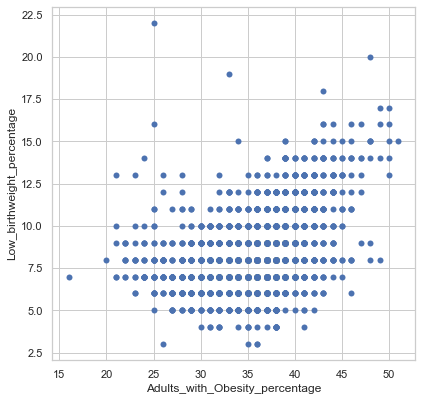

In [49]:

conn = create_connection('Measure Data.db')
cur = conn.cursor()
obesity_effect_bw = list(cur.execute('select Adults_with_Obesity_percentage, Low_birthweight_percentage from Data'))
obesity_effect_bw = pd.DataFrame(obesity_effect_bw, columns =['Adults_with_Obesity_percentage', 'Low_birthweight_percentage']).replace(r'^\s*$', np.NaN, regex=True)
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(x='Adults_with_Obesity_percentage', y='Low_birthweight_percentage',
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=obesity_effect_bw, ax=ax)

<AxesSubplot:xlabel='Food_Environment_Index', ylabel='Low_birthweight_percentage'>

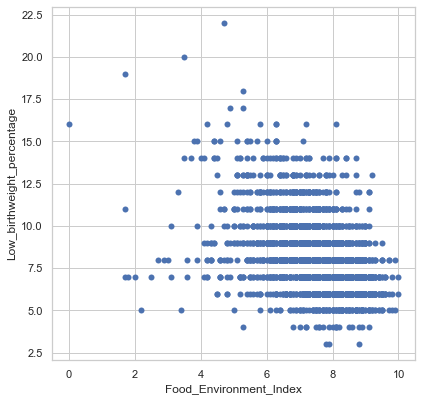

In [50]:
conn = create_connection('Measure Data.db')
cur = conn.cursor()
food_environment_index_effect_bw = list(cur.execute('select Food_Environment_Index, Low_birthweight_percentage from Data'))
food_environment_index_effect_bw = pd.DataFrame(food_environment_index_effect_bw, columns =['Food_Environment_Index', 'Low_birthweight_percentage']).replace(r'^\s*$', np.NaN, regex=True)
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(x='Food_Environment_Index', y='Low_birthweight_percentage',
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=food_environment_index_effect_bw, ax=ax)

<AxesSubplot:xlabel='Physically_Inactive_percentage', ylabel='Low_birthweight_percentage'>

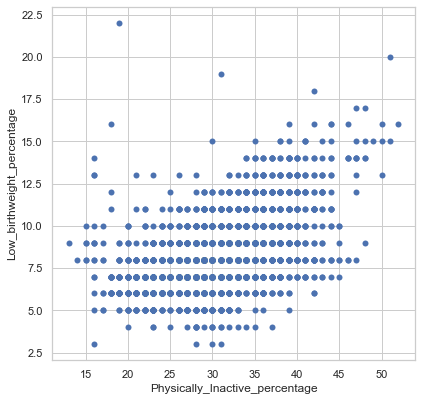

In [51]:
conn = create_connection('Measure Data.db')
cur = conn.cursor()
physical_inactive_effect_bw = list(cur.execute('select Physically_Inactive_percentage, Low_birthweight_percentage from Data'))
physical_inactive_effect_bw = pd.DataFrame(physical_inactive_effect_bw, columns =['Physically_Inactive_percentage', 'Low_birthweight_percentage']).replace(r'^\s*$', np.NaN, regex=True)
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(x='Physically_Inactive_percentage', y='Low_birthweight_percentage',
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=physical_inactive_effect_bw, ax=ax)

<AxesSubplot:xlabel='With_Access_to_Exercise_Opportunities_percentage', ylabel='Low_birthweight_percentage'>

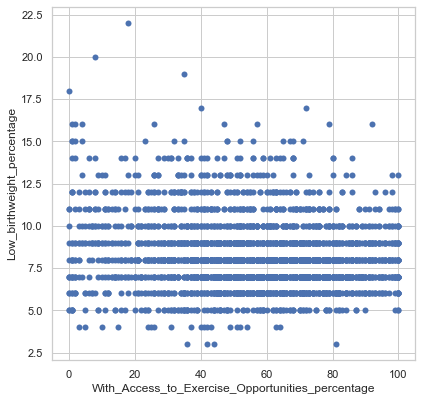

In [52]:
conn = create_connection('Measure Data.db')
cur = conn.cursor()
exercise_opportunity_effect_bw = list(cur.execute('select With_Access_to_Exercise_Opportunities_percentage, Low_birthweight_percentage from Data'))
exercise_opportunity_effect_bw = pd.DataFrame(exercise_opportunity_effect_bw, columns =['With_Access_to_Exercise_Opportunities_percentage', 'Low_birthweight_percentage']).replace(r'^\s*$', np.NaN, regex=True)
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(x='With_Access_to_Exercise_Opportunities_percentage', y='Low_birthweight_percentage',
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=exercise_opportunity_effect_bw, ax=ax)

<AxesSubplot:xlabel='Excessive_Drinking_percentage', ylabel='Low_birthweight_percentage'>

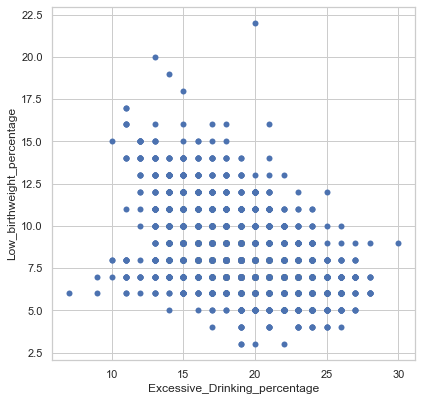

In [53]:
conn = create_connection('Measure Data.db')
cur = conn.cursor()
excessive_drinking_effect_bw = list(cur.execute('select Excessive_Drinking_percentage, Low_birthweight_percentage from Data'))
excessive_drinking_effect_bw = pd.DataFrame(excessive_drinking_effect_bw, columns =['Excessive_Drinking_percentage', 'Low_birthweight_percentage']).replace(r'^\s*$', np.NaN, regex=True)
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(x='Excessive_Drinking_percentage', y='Low_birthweight_percentage',
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=excessive_drinking_effect_bw, ax=ax)

<AxesSubplot:xlabel='Alcohol_Impaired_Driving_Deaths_number', ylabel='Low_birthweight_percentage'>

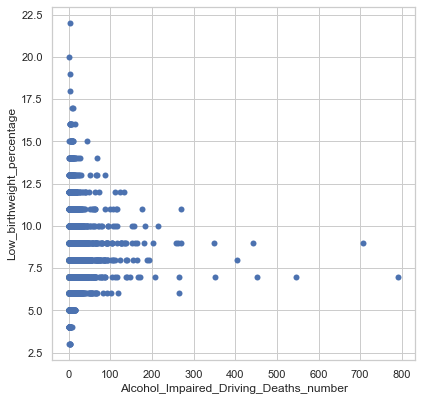

In [54]:
conn = create_connection('Measure Data.db')
cur = conn.cursor()
Alcohol_Impaired_Driving_Deaths_Effect_bw = list(cur.execute('select Alcohol_Impaired_Driving_Deaths_number, Low_birthweight_percentage from Data'))
Alcohol_Impaired_Driving_Deaths_Effect_bw = pd.DataFrame(Alcohol_Impaired_Driving_Deaths_Effect_bw, columns =['Alcohol_Impaired_Driving_Deaths_number', 'Low_birthweight_percentage']).replace(r'^\s*$', np.NaN, regex=True)
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(x='Alcohol_Impaired_Driving_Deaths_number', y='Low_birthweight_percentage',
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=Alcohol_Impaired_Driving_Deaths_Effect_bw, ax=ax)

<AxesSubplot:xlabel='Driving_Deaths_number', ylabel='Low_birthweight_percentage'>

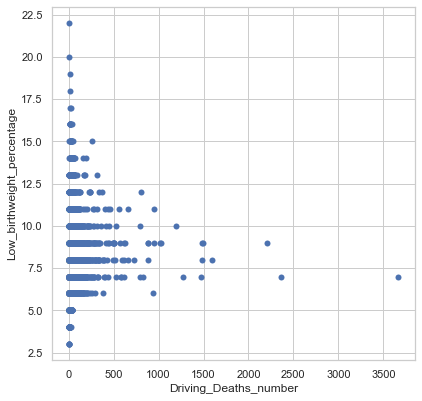

In [55]:
conn = create_connection('Measure Data.db')
cur = conn.cursor()
Driving_Deaths_Effect_bw = list(cur.execute('select Driving_Deaths_number, Low_birthweight_percentage from Data'))
Driving_Deaths_Effect_bw = pd.DataFrame(Driving_Deaths_Effect_bw, columns =['Driving_Deaths_number', 'Low_birthweight_percentage']).replace(r'^\s*$', np.NaN, regex=True)
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(x='Driving_Deaths_number', y='Low_birthweight_percentage',
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=Driving_Deaths_Effect_bw, ax=ax)

<AxesSubplot:xlabel='Driving_Deaths_with_Alcohol_Involvement_percentage', ylabel='Low_birthweight_percentage'>

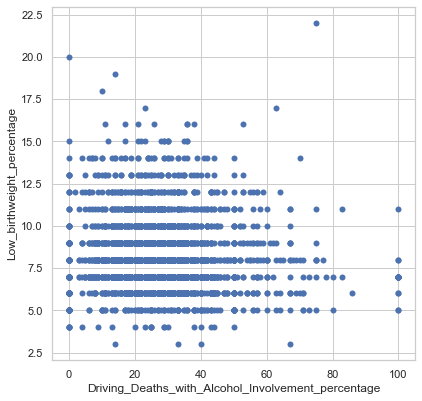

In [56]:
conn = create_connection('Measure Data.db')
cur = conn.cursor()
Driving_Deaths_with_Alcohol_Involvement_Effect_bw = list(cur.execute('select Driving_Deaths_with_Alcohol_Involvement_percentage, Low_birthweight_percentage from Data'))
Driving_Deaths_with_Alcohol_Involvement_Effect_bw = pd.DataFrame(Driving_Deaths_with_Alcohol_Involvement_Effect_bw, columns =['Driving_Deaths_with_Alcohol_Involvement_percentage', 'Low_birthweight_percentage']).replace(r'^\s*$', np.NaN, regex=True)
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(x='Driving_Deaths_with_Alcohol_Involvement_percentage', y='Low_birthweight_percentage',
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=Driving_Deaths_with_Alcohol_Involvement_Effect_bw, ax=ax)

<AxesSubplot:xlabel='Chlamydia_Cases_number', ylabel='Low_birthweight_percentage'>

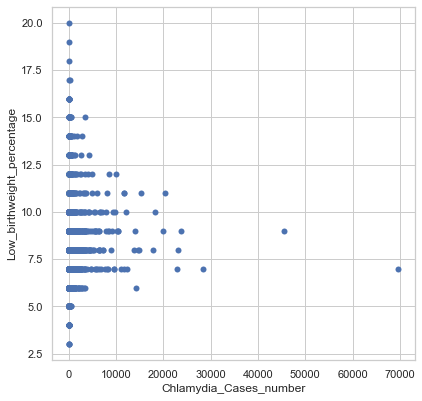

In [57]:
conn = create_connection('Measure Data.db')
cur = conn.cursor()
Chlamydia_Cases_Effect_bw = list(cur.execute('select Chlamydia_Cases_number, Low_birthweight_percentage from Data'))
Chlamydia_Cases_Effect_bw = pd.DataFrame(Chlamydia_Cases_Effect_bw, columns =['Chlamydia_Cases_number', 'Low_birthweight_percentage']).replace(r'^\s*$', np.NaN, regex=True)
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(x='Chlamydia_Cases_number', y='Low_birthweight_percentage',
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=Chlamydia_Cases_Effect_bw, ax=ax)

<AxesSubplot:xlabel='Chlamydia_Rate', ylabel='Low_birthweight_percentage'>

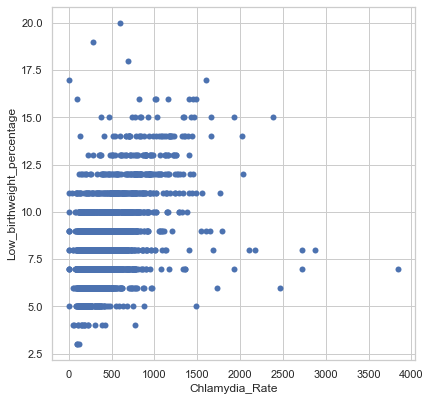

In [58]:
conn = create_connection('Measure Data.db')
cur = conn.cursor()
Chlamydia_Rate_Effect_bw = list(cur.execute('select Chlamydia_Rate, Low_birthweight_percentage from Data'))
Chlamydia_Rate_Effect_bw = pd.DataFrame(Chlamydia_Rate_Effect_bw, columns =['Chlamydia_Rate', 'Low_birthweight_percentage']).replace(r'^\s*$', np.NaN, regex=True)
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(x='Chlamydia_Rate', y='Low_birthweight_percentage',
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=Chlamydia_Rate_Effect_bw, ax=ax)

<AxesSubplot:xlabel='Teen_Birth_Rate', ylabel='Low_birthweight_percentage'>

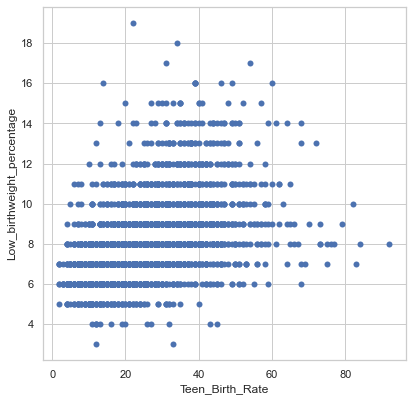

In [59]:
conn = create_connection('Measure Data.db')
cur = conn.cursor()
Teen_Birth_Rate_Effect_bw = list(cur.execute('select Teen_Birth_Rate, Low_birthweight_percentage from Data'))
Teen_Birth_Rate_Effect_bw = pd.DataFrame(Teen_Birth_Rate_Effect_bw, columns =['Teen_Birth_Rate', 'Low_birthweight_percentage']).replace(r'^\s*$', np.NaN, regex=True)

sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(x='Teen_Birth_Rate', y='Low_birthweight_percentage',
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=Teen_Birth_Rate_Effect_bw, ax=ax)

# Linear regression

In [60]:
columns_name = ['Deaths', 'Years_of_Potential_Life_Lost_Rate', 'Fair_or_Poor_Health_percentage', 'Average_Number_of_Physically_Unhealthy_Days', 'Average_Number_of_Mentally_Unhealthy_Days', 'Low_birthweight_percentage', 'Smokers_percentage', 'Adults_with_Obesity_percentage', 'Food_Environment_Index', 'Physically_Inactive_percentage', 'With_Access_to_Exercise_Opportunities_percentage', 'Excessive_Drinking_percentage', 'Alcohol_Impaired_Driving_Deaths_number', 'Driving_Deaths_number', 'Driving_Deaths_with_Alcohol_Involvement_percentage', 'Chlamydia_Cases_number', 'Chlamydia_Rate', 'Teen_Birth_Rate', 'Uninsured_number', 'Uninsured_percentage', 'Mental_Health_Providers_number', 'Mental_Health_Provider_Rate', 'Preventable_Hospitalization_Rate', 'Vaccinated_percentage', 'Completed_High_School_number', 'High_School_Completion_Population', 'Completed_High_School_percentage', 'Some_College_number', 'Some_college_Population', 'Some_College_percentage', 'Unemployed_number', 'Labor_Force', 'Unemployed_percentage', 'Children_in_Poverty_percentage', 'Percentile_Income_80th', 'Percentile_Income_20th', 'Income_Ratio', 'Annual_Average_Violent_Crimes', 'Violent_Crime_Rate', 'Injury_Deaths_number', 'Injury_Death_Rate', 'Severe_Housing_Problems_percentage', 'Severe_Housing_Cost_Burden', 'Overcrowding', 'Inadequate_Facilities', 'Drive_Alone_to_Work_percentage', 'Workers_who_Drive_Alone_number', 'Long_Commute_Drives_Alone_percentage','CountyID']

In [61]:
import numpy as np
conn = create_connection('Measure Data.db')
cur = conn.cursor()
measure_data = list(cur.execute('select * from Data'))
measure_data = pd.DataFrame(measure_data, columns=columns_name)
measure_data = measure_data.replace(r'^\s*$', np.NaN, regex=True) #replace empty cell to NaN, convert to float
measure_data = measure_data.fillna(0)

In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
drop_list = ['CountyID','Fair_or_Poor_Health_percentage', 'Average_Number_of_Physically_Unhealthy_Days',
             'Average_Number_of_Mentally_Unhealthy_Days', 'Low_birthweight_percentage']

### Fair or poor health

In [84]:
X= measure_data.drop(labels= drop_list, axis= 1).iloc[: , :]
# X = preprocessing.normalize(X)
y = measure_data['Fair_or_Poor_Health_percentage']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.6,test_size= 0.4, random_state= 101)
model = LinearRegression(normalize=True).fit(X_train, y_train)
y_pred = model.predict(X_test)

In [85]:
# The coefficients
print("Coefficients: \n", model.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Coefficients: 
 [-6.71697967e-05 -3.50162137e-05  1.48866660e-01  1.21974226e-01
 -1.60814841e-01  7.91416174e-02  4.84572729e-03 -2.32077811e-01
 -2.91022982e-03  2.00406568e-03 -2.23161155e-03 -1.39043147e-04
  3.23769603e-04  1.67578058e-02  9.69732835e-06  8.26043797e-02
  5.65437930e-05  1.95496743e-04  5.60124126e-05 -2.15432312e-02
 -7.17577708e-06  1.61180712e-05 -2.45959980e-01  3.79019720e-05
 -2.35000065e-05 -2.86131020e-02  4.57694496e-06 -9.64359528e-06
  1.80173381e-01  3.68635129e-02 -2.68718453e-05  5.38558434e-05
  5.49278450e-01 -1.83827259e-04  1.11741780e-03  4.92502930e-04
 -4.15092990e-03  1.19285354e-01 -6.84509333e-02  8.31336343e-02
 -9.41373624e-02  9.32648901e-03 -7.43199200e-06  1.12680599e-02]
Mean squared error: 1.51
Coefficient of determination: 0.94


Coefficients: 
 [ 0.20679298  0.20676875 -0.40201567 -0.28570128 -0.39854911  0.14072357
  0.32465033  0.10446655]
Mean squared error: 1.51
Coefficient of determination: 0.94
Residual sum of squares: 251.77
Feature: 0, Score: 0.20679
Feature: 1, Score: 0.20677
Feature: 2, Score: -0.40202
Feature: 3, Score: -0.28570
Feature: 4, Score: -0.39855
Feature: 5, Score: 0.14072
Feature: 6, Score: 0.32465
Feature: 7, Score: 0.10447


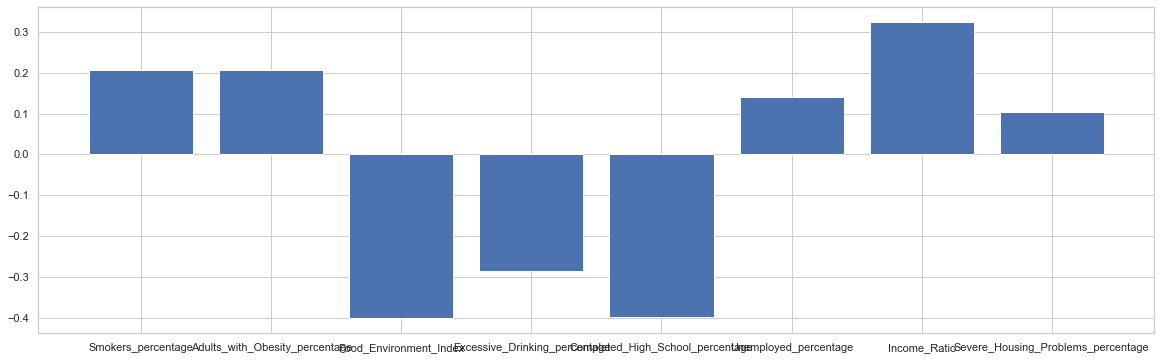

<Figure size 432x288 with 0 Axes>

In [86]:
from matplotlib import pyplot
importance = np.array(abs(model.coef_)*(10)>1)
importance
X = X.loc[:, importance]
y = measure_data['Fair_or_Poor_Health_percentage']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.6,test_size= 0.4, random_state= 101)
model = LinearRegression(normalize=True).fit(X_train, y_train)
# The coefficients
print("Coefficients: \n", model.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))
print('Residual sum of squares: %.2f' %np.sum((y_test - y_pred))** 2)

importance = np.array(model.coef_)

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.figure(figsize=(20, 6))
pyplot.bar(list(X.columns), importance)
pyplot.show()

### Average_Number_of_Physically_Unhealthy_Days

In [101]:
X= measure_data.drop(labels= drop_list, axis= 1).iloc[: , :]
# X = preprocessing.normalize(X)
y = measure_data['Average_Number_of_Physically_Unhealthy_Days']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.6,test_size= 0.4, random_state= 101)
model = LinearRegression(normalize=True).fit(X_train, y_train)
y_pred = model.predict(X_test)

In [102]:
# The coefficients
print("Coefficients: \n", model.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Coefficients: 
 [ 1.55617016e-05 -3.43936733e-07  9.60070203e-02 -3.60704459e-03
 -2.23950479e-02 -1.75468322e-02  4.22774334e-04 -6.26625911e-02
 -2.40223254e-04  5.58287902e-04  7.57264339e-04 -1.74715882e-05
 -1.35769831e-04  1.79940456e-03  6.64795310e-07  2.45577509e-04
  1.23458848e-05  3.44280398e-05  3.48393103e-06 -3.24462499e-03
  6.80291741e-07 -5.42700289e-08 -2.03686174e-02  1.14476811e-06
  7.00566754e-08 -4.47137483e-03  1.90354640e-07 -1.66238337e-06
  1.37049922e-02  2.02802500e-03 -3.21502861e-06 -2.22607073e-06
  5.66383315e-02 -4.05704043e-05  2.60083555e-04 -1.63758373e-05
 -3.64629277e-04  7.48821016e-03  7.78067320e-03  1.48931126e-02
 -1.23342185e-02 -2.59844616e-05  1.99829941e-07  2.81975596e-03]
Mean squared error: 0.06
Coefficient of determination: 0.90


In [68]:
columns_name = ['Deaths', 'Years_of_Potential_Life_Lost_Rate', 'Smokers_percentage', 'Adults_with_Obesity_percentage', 'Food_Environment_Index', 'Physically_Inactive_percentage', 'With_Access_to_Exercise_Opportunities_percentage', 'Excessive_Drinking_percentage', 'Alcohol_Impaired_Driving_Deaths_number', 'Driving_Deaths_number', 'Driving_Deaths_with_Alcohol_Involvement_percentage', 'Chlamydia_Cases_number', 'Chlamydia_Rate', 'Teen_Birth_Rate', 'Uninsured_number', 'Uninsured_percentage', 'Mental_Health_Providers_number', 'Mental_Health_Provider_Rate', 'Preventable_Hospitalization_Rate', 'Vaccinated_percentage', 'Completed_High_School_number', 'High_School_Completion_Population', 'Completed_High_School_percentage', 'Some_College_number', 'Some_college_Population', 'Some_College_percentage', 'Unemployed_number', 'Labor_Force', 'Unemployed_percentage', 'Children_in_Poverty_percentage', 'Percentile_Income_80th', 'Percentile_Income_20th', 'Income_Ratio', 'Annual_Average_Violent_Crimes', 'Violent_Crime_Rate', 'Injury_Deaths_number', 'Injury_Death_Rate', 'Severe_Housing_Problems_percentage', 'Severe_Housing_Cost_Burden', 'Overcrowding', 'Inadequate_Facilities', 'Drive_Alone_to_Work_percentage', 'Workers_who_Drive_Alone_number', 'Long_Commute_Drives_Alone_percentage']

Feature: Smokers_percentage, Score: 0.09601
Feature: Food_Environment_Index, Score: -0.02240
Feature: Physically_Inactive_percentage, Score: -0.01755
Feature: Excessive_Drinking_percentage, Score: -0.06266
Feature: Completed_High_School_percentage, Score: -0.02037
Feature: Unemployed_percentage, Score: 0.01370
Feature: Income_Ratio, Score: 0.05664
Feature: Overcrowding, Score: 0.01489
Feature: Inadequate_Facilities, Score: -0.01233


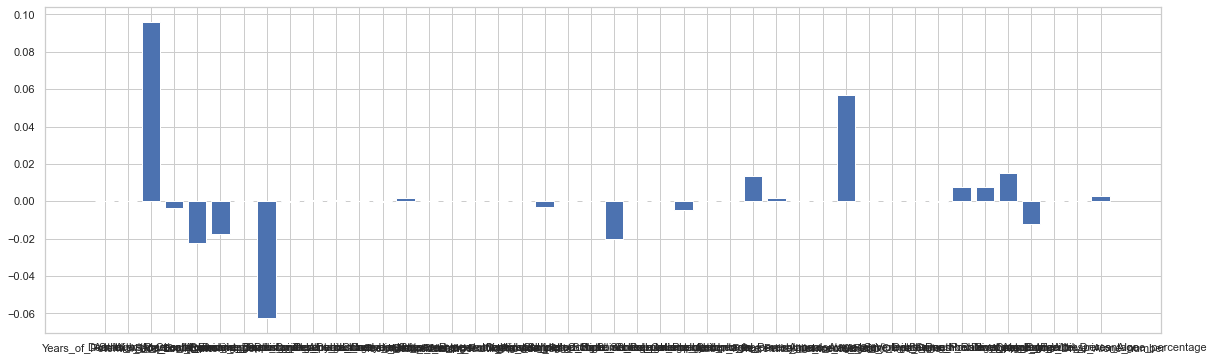

<Figure size 432x288 with 0 Axes>

In [103]:
from matplotlib import pyplot
importance = np.array(model.coef_)

for i,v in zip(columns_name,importance):
    if abs(v) > 0.01: 
        print('Feature: %s, Score: %.5f' % (i,v))
# plot feature importance
pyplot.figure(figsize=(20, 6))
pyplot.bar(list(X.columns), importance)
pyplot.show()

### Average_Number_of_Mentally_Unhealthy_Days

In [98]:
X= measure_data.drop(labels= drop_list, axis= 1).iloc[: , :]
# X = preprocessing.normalize(X)
y = measure_data['Average_Number_of_Mentally_Unhealthy_Days']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.6,test_size= 0.4, random_state= 101)
model = LinearRegression(normalize=True).fit(X_train, y_train)
y_pred = model.predict(X_test)

In [99]:
# The coefficients
print("Coefficients: \n", model.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Coefficients: 
 [ 5.90653468e-05  6.24588352e-06  1.12509476e-01 -9.92109219e-03
 -2.64756834e-02 -2.38841708e-02  5.72719234e-05 -6.08107830e-02
 -9.81275099e-04  7.76787366e-04 -6.51294624e-04 -1.69586560e-05
 -1.23834020e-04 -1.38220762e-03 -2.10083944e-07 -2.40168906e-03
  2.72995273e-05  5.43137911e-05  9.59449063e-06 -8.01981755e-04
 -2.24552274e-06  9.95940093e-07 -3.27854292e-03  3.25048916e-06
 -1.56803982e-06 -3.95377629e-03 -4.14326977e-06 -1.00446374e-06
  2.79738908e-02  7.16474778e-04 -7.65918126e-07 -8.58018714e-06
 -6.24312844e-04 -3.55574680e-05  2.56147990e-04 -6.71813198e-05
 -8.37235268e-04 -2.09601892e-02  2.80543161e-02  6.16470606e-03
  1.61699868e-02  7.05294894e-03  1.46385433e-06  5.62625533e-03]
Mean squared error: 0.08
Coefficient of determination: 0.82


Feature: Smokers_percentage, Score: 0.11251
Feature: Excessive_Drinking_percentage, Score: -0.06081


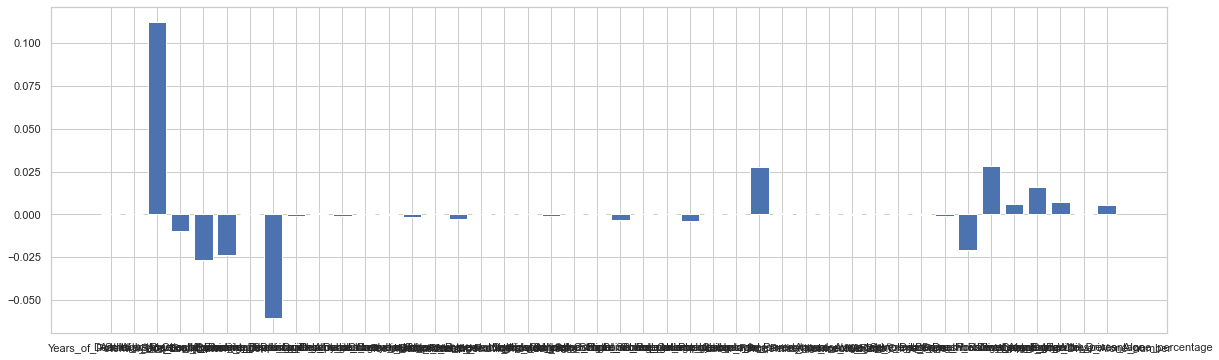

<Figure size 432x288 with 0 Axes>

In [100]:
from matplotlib import pyplot
importance = np.array(model.coef_)

for i,v in zip(columns_name,importance):
    if abs(v) > 0.05: 
        print('Feature: %s, Score: %.5f' % (i,v))
# plot feature importance
pyplot.figure(figsize=(20, 6))
pyplot.bar(list(X.columns), importance)
pyplot.show()

### Low_birthweight_percentage

In [95]:
X= measure_data.drop(labels= drop_list, axis= 1).iloc[: , :]
# X = preprocessing.normalize(X)
y = measure_data['Low_birthweight_percentage']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.6,test_size= 0.4, random_state= 101)
model = LinearRegression(normalize=True).fit(X_train, y_train)
y_pred = model.predict(X_test)

In [96]:
# The coefficients
print("Coefficients: \n", model.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Coefficients: 
 [ 7.63388169e-05  9.88063976e-05 -6.03525600e-02 -4.02026795e-02
  7.59684337e-02  1.48227244e-02  9.07258790e-03 -9.80851123e-02
 -1.29927005e-03  4.09073904e-04  2.22888583e-03  2.03265473e-04
  2.31611862e-03  4.75752656e-03  1.54521117e-05 -3.30139222e-02
  4.09465446e-05 -7.15634311e-04  1.30857030e-04 -5.21038917e-03
  2.04935141e-05 -1.50740098e-05 -3.32744619e-02  1.74294821e-05
 -2.12695376e-05 -7.83320363e-03  2.55612464e-06  5.96057663e-06
  5.71967048e-02  5.71256745e-02 -2.04055281e-06  1.31942897e-05
  2.13501518e-01 -2.17660220e-05  7.41863260e-04 -5.67767280e-04
  6.56621309e-03  4.20198285e-02  8.12661382e-03 -1.71398509e-01
 -2.57266554e-02  5.22008279e-02 -9.56600043e-06  1.75312102e-02]
Mean squared error: 2.86
Coefficient of determination: 0.54


Feature: Income_Ratio, Score: 0.21350
Feature: Overcrowding, Score: -0.17140


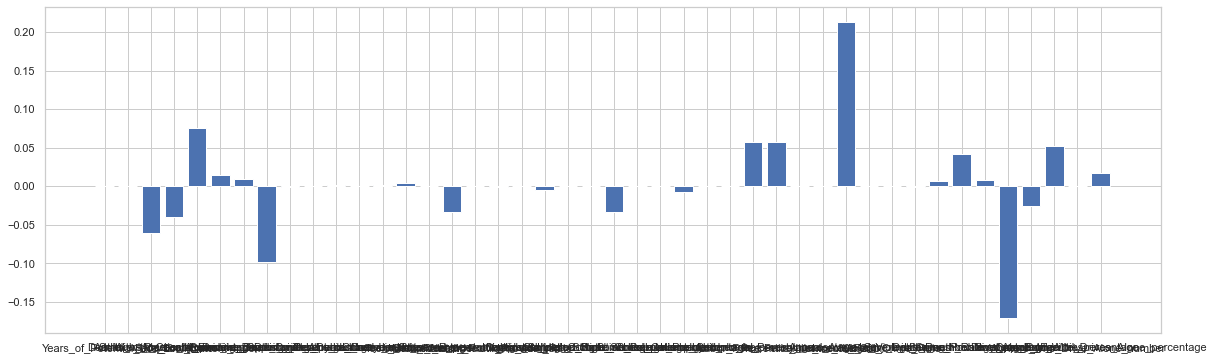

<Figure size 432x288 with 0 Axes>

In [97]:
from matplotlib import pyplot
importance = np.array(model.coef_)

for i,v in zip(columns_name,importance):
    if abs(v) > 0.1: 
        print('Feature: %s, Score: %.5f' % (i,v))
# plot feature importance
pyplot.figure(figsize=(20, 6))
pyplot.bar(list(X.columns), importance)
pyplot.show()